In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Layer
import sklearn
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

# Creating data using sklearn

In [2]:
X,y = make_regression(n_samples = 10,                 # number of samples
                      n_features = 3,                    # number of features
                   n_informative = 3,                    # number of useful features

                    random_state = 42)                   # set for same data points for each run



In [3]:
X = 10 * X.round(2)

In [4]:
X

array([[ -9.1,  14.7, -14.1],
       [ -5.4, -11.5,   1.1],
       [  2.4, -17.2, -19.1],
       [  3.8,  -2.9,  -6. ],
       [ 15.2,  -2.3,  -2.3],
       [  5.4,  -4.7,  -4.6],
       [  5. ,   6.5,  -1.4],
       [ -5.6,   3.1, -10.1],
       [ 15.8,  -4.7,   7.7],
       [ -2.3, -14.2,   0.7]])

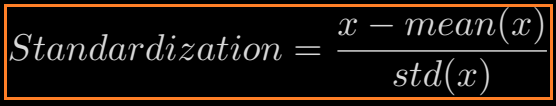

# Creating Custom Layer

In [5]:
class Standardized(Layer):

    def __init__(self, units=3):
        super(Standardized, self).__init__()
        self.units = units

    def build(self, input_shape = 3):
        # initialize the weights
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name="kernel",   initial_value=w_init(shape=(input_shape[-1], self.units),
                 dtype='float32'),trainable=False)

        # initialize the biases
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name="bias",initial_value=b_init(shape=(self.units,), dtype='float32'),trainable=False)

    def call(self, x):
        z = (x - tf.reduce_mean(x)) /tf.math.reduce_std(x)
        return z

In [6]:
stand_layer = Standardized()

In [7]:
stand_layer(X)

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[-0.81770337,  1.8740448 , -1.3831966 ],
       [-0.39923826, -1.08914   ,  0.33590305],
       [ 0.48293132, -1.7338026 , -1.9486898 ],
       [ 0.6412694 , -0.11649162, -0.46709746],
       [ 1.9305941 , -0.0486324 , -0.0486324 ],
       [ 0.8222273 , -0.32006916, -0.3087593 ],
       [ 0.7769878 ,  0.9466358 ,  0.05315639],
       [-0.42185798,  0.56210035, -0.930802  ],
       [ 1.9984533 , -0.32006916,  1.0823541 ],
       [-0.0486324 , -1.3945065 ,  0.29066357]], dtype=float32)>

# Create Neural Network and add customized layer


In [8]:
model = Sequential()
model.add(Input(shape =(3,)))
model.add(stand_layer)
model.add(Dense(units = 1, activation = None))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 standardized (Standardized  (None, 3)                 12        
 )                                                               
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 16 (64.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 12 (48.00 Byte)
_________________________________________________________________


# Compile the model

In [10]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) ,loss='mse')

# Train the model

In [11]:
hist = model.fit(X, y, epochs = 20)

Epoch 1/20
1/1 [==============================] - 0s 378ms/step - loss: 5564.5981
Epoch 2/20
1/1 [==============================] - 0s 9ms/step - loss: 5331.3481
Epoch 3/20
1/1 [==============================] - 0s 8ms/step - loss: 5108.4736
Epoch 4/20
1/1 [==============================] - 0s 7ms/step - loss: 4895.4854
Epoch 5/20
1/1 [==============================] - 0s 8ms/step - loss: 4691.9238
Epoch 6/20
1/1 [==============================] - 0s 8ms/step - loss: 4497.3462
Epoch 7/20
1/1 [==============================] - 0s 13ms/step - loss: 4311.3354
Epoch 8/20
1/1 [==============================] - 0s 8ms/step - loss: 4133.4941
Epoch 9/20
1/1 [==============================] - 0s 12ms/step - loss: 3963.4441
Epoch 10/20
1/1 [==============================] - 0s 8ms/step - loss: 3800.8250
Epoch 11/20
1/1 [==============================] - 0s 10ms/step - loss: 3645.2954
Epoch 12/20
1/1 [==============================] - 0s 7ms/step - loss: 3496.5288
Epoch 13/20
1/1 [===============